## Importing the libraries and diving the dataset into training and testing set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Checking the correlation of features 

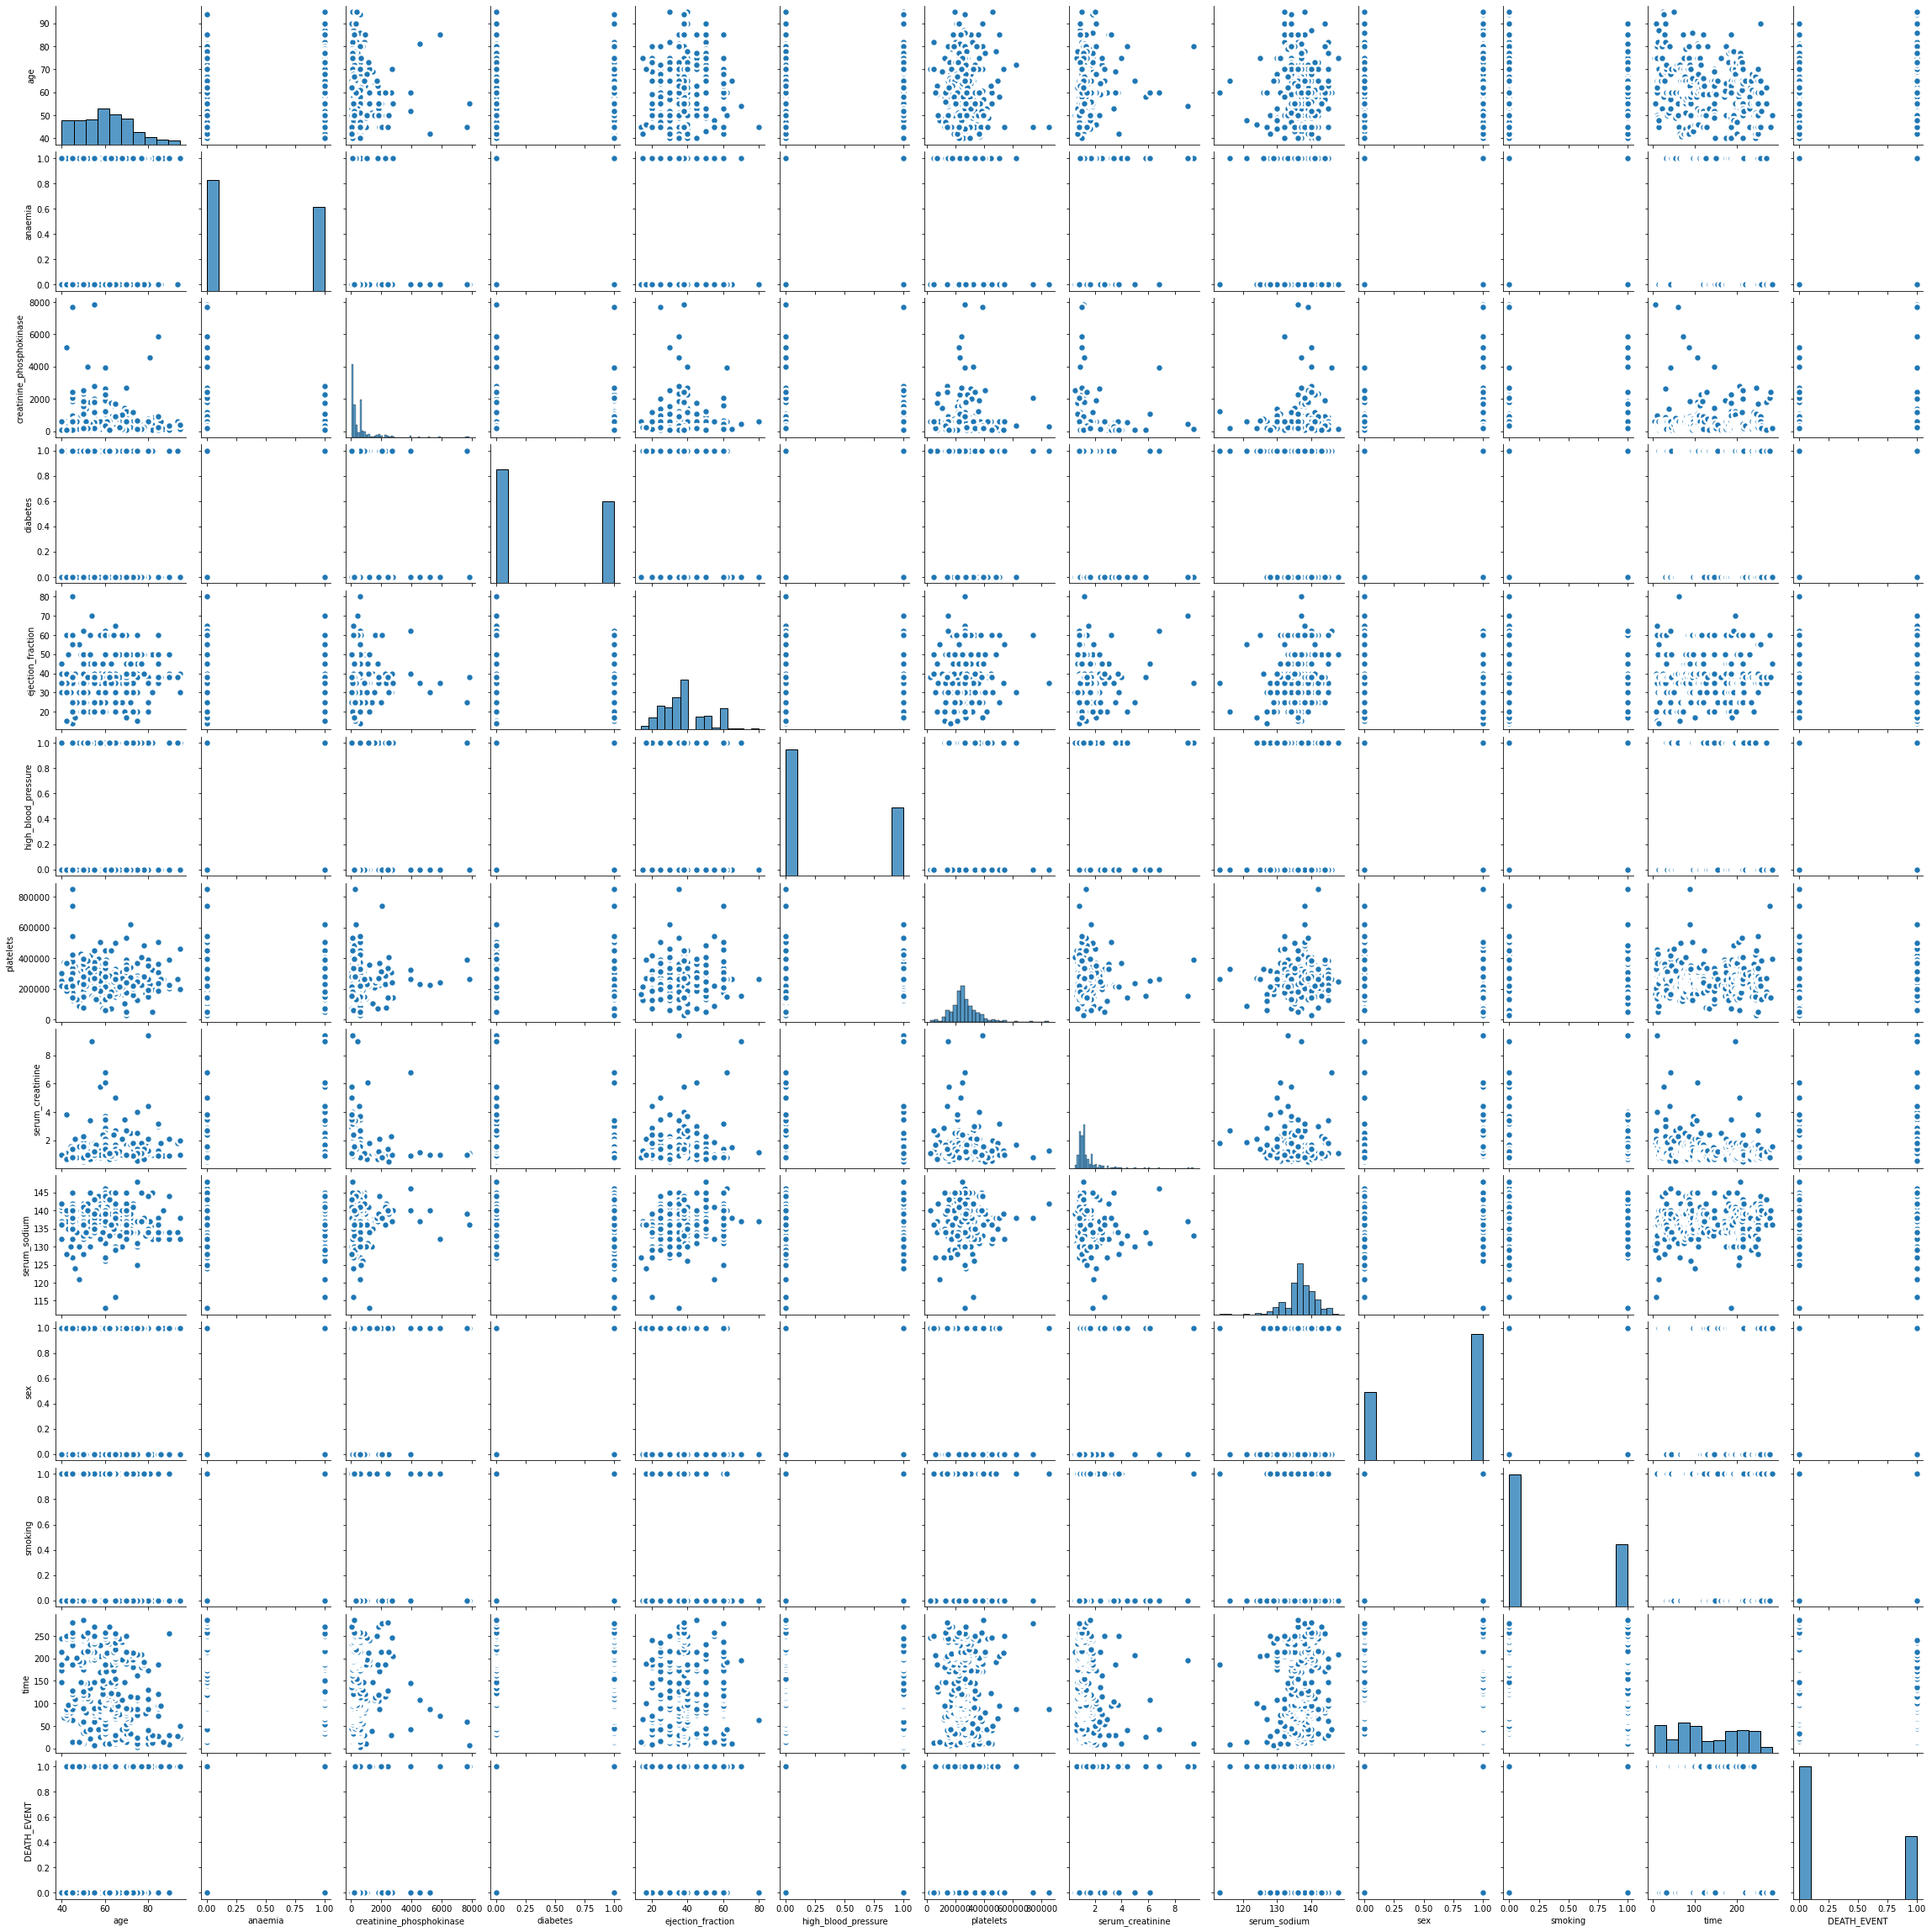

In [4]:
import seaborn as sns
sns.pairplot(dataset, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<AxesSubplot:>

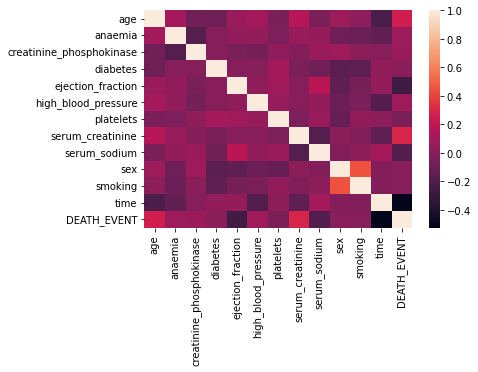

In [5]:
correlation = dataset.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

In [6]:
dataset.corr(method ='pearson') 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [7]:
dataset.corr(method ='kendall') 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.060190,-0.063180,-0.075029,0.051284,0.088488,-0.037190,0.190089,-0.073368,0.048362,0.025227,-0.136660,0.182536
anaemia,0.060190,1.000000,-0.178712,-0.012729,0.017519,0.038182,-0.029259,-0.013774,0.052115,-0.094769,-0.107290,-0.110498,0.066270
creatinine_phosphokinase,-0.063180,-0.178712,1.000000,0.034985,-0.047061,-0.066753,0.039742,-0.035139,0.013129,0.010997,-0.025098,0.083444,0.019529
diabetes,-0.075029,-0.012729,0.034985,1.000000,-0.010242,-0.012732,0.060665,0.001637,-0.047007,-0.157730,-0.147173,0.024209,-0.001943
ejection_fraction,0.051284,0.017519,-0.047061,-0.010242,1.000000,0.015435,0.037870,-0.129745,0.118261,-0.112508,-0.061718,0.050908,-0.246766
high_blood_pressure,0.088488,0.038182,-0.066753,-0.012732,0.015435,1.000000,0.056715,-0.075944,0.016364,-0.104615,-0.055711,-0.159852,0.079351
platelets,-0.037190,-0.029259,0.039742,0.060665,0.037870,0.056715,1.000000,-0.035681,0.034561,-0.112929,0.003922,-0.004369,-0.037962
serum_creatinine,0.190089,-0.013774,-0.035139,0.001637,-0.129745,-0.075944,-0.035681,1.000000,-0.223007,0.044186,-0.014435,-0.109593,0.313822
serum_sodium,-0.073368,0.052115,0.013129,-0.047007,0.118261,0.016364,0.034561,-0.223007,1.000000,-0.065421,0.007074,0.059389,-0.178090
sex,0.048362,-0.094769,0.010997,-0.157730,-0.112508,-0.104615,-0.112929,0.044186,-0.065421,1.000000,0.445892,-0.014223,-0.004316


In [8]:
dataset.corr(method ='spearman') 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.071924,-0.093078,-0.089657,0.074047,0.105740,-0.052091,0.270561,-0.101716,0.057791,0.030145,-0.197524,0.218125
anaemia,0.071924,1.000000,-0.216116,-0.012729,0.020366,0.038182,-0.035608,-0.016267,0.061405,-0.094769,-0.107290,-0.134652,0.066270
creatinine_phosphokinase,-0.093078,-0.216116,1.000000,0.042308,-0.067839,-0.080724,0.060033,-0.049936,0.016886,0.013298,-0.030351,0.125823,0.023616
diabetes,-0.089657,-0.012729,0.042308,1.000000,-0.011906,-0.012732,0.073829,0.001933,-0.055386,-0.157730,-0.147173,0.029501,-0.001943
ejection_fraction,0.074047,0.020366,-0.067839,-0.011906,1.000000,0.017943,0.053696,-0.177986,0.161695,-0.130792,-0.071748,0.070533,-0.286869
high_blood_pressure,0.105740,0.038182,-0.080724,-0.012732,0.017943,1.000000,0.069021,-0.089692,0.019281,-0.104615,-0.055711,-0.194794,0.079351
platelets,-0.052091,-0.035608,0.060033,0.073829,0.053696,0.069021,1.000000,-0.051028,0.049453,-0.137433,0.004774,-0.006927,-0.046200
serum_creatinine,0.270561,-0.016267,-0.049936,0.001933,-0.177986,-0.089692,-0.051028,1.000000,-0.300413,0.052184,-0.017048,-0.160990,0.370630
serum_sodium,-0.101716,0.061405,0.016886,-0.055386,0.161695,0.019281,0.049453,-0.300413,1.000000,-0.077084,0.008335,0.086393,-0.209837
sex,0.057791,-0.094769,0.013298,-0.157730,-0.130792,-0.104615,-0.137433,0.052184,-0.077084,1.000000,0.445892,-0.017332,-0.004316


In [9]:
correlation[abs(correlation['DEATH_EVENT']) > 0.2]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

## Making a new dataset using the values with highest correlation (taking average of all 3 methods)

In [10]:
final_df = dataset[['age', 'ejection_fraction', 'serum_creatinine', 'time', 'DEATH_EVENT']]

In [11]:
final_df.head()

,age,ejection_fraction,serum_creatinine,time,DEATH_EVENT
0,75.0,20,1.9,4,1
1,55.0,38,1.1,6,1
2,65.0,20,1.3,7,1
3,50.0,20,1.9,7,1
4,65.0,20,2.7,8,1


In [12]:
X = final_df.iloc[:, :-1].values
y = final_df.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Support Vector Machine

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [16]:
## KFold Cross validation

from sklearn.model_selection import cross_val_score
svm_cvs_acc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(svm_cvs_acc.mean()*100))

Accuracy: 84.37 %


## Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [18]:
rf_cvs_acc = cross_val_score(estimator = rfclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rf_cvs_acc.mean()*100))

Accuracy: 84.31 %


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(random_state = 0)
lrclassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
lr_cvs_acc = cross_val_score(estimator = lrclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(lr_cvs_acc.mean()*100))

Accuracy: 85.69 %


## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, y_train)

GaussianNB()

In [22]:
nb_cvs_acc = cross_val_score(estimator = nbclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(nb_cvs_acc.mean()*100))

Accuracy: 82.96 %


## K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
from sklearn.model_selection import cross_val_score
knn_cvs_acc = cross_val_score(estimator = knnclassifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_cvs_acc.mean()*100))

Accuracy: 82.13 %




---




### The maximum accuracy is achieved by Logistic Regression with 85.69%